# Tratamiento de datos COVID-10
## Objeto
Se tratarán los datos de la [Johns Hopkins](https://github.com/CSSEGISandData/COVID-19) que se suponen en el directorio data/COVID-19

## Actualización de ficheros

Se actualizarán, vía git, los ficheros csv

In [28]:
! cd data/COVID-19; git pull
! ls -l data/COVID-19/csse_covid_19_data/csse_covid_19_time_series

Already up to date.
total 8376
-rw-r--r-- 1 10001 10001   73792 Jan  2 12:10 Errata.csv
-rw-r--r-- 1 10001 10001    1692 Jan  2 12:10 README.md
-rw-r--r-- 1 10001 10001  422930 Jan  6 05:59 time_series_covid19_confirmed_global.csv
-rw-r--r-- 1 10001 10001 4284427 Jan  6 05:59 time_series_covid19_confirmed_US.csv
-rw-r--r-- 1 10001 10001  294518 Jan  6 05:59 time_series_covid19_deaths_global.csv
-rw-r--r-- 1 10001 10001 3103880 Jan  6 05:59 time_series_covid19_deaths_US.csv
-rw-r--r-- 1 10001 10001  379295 Jan  6 05:59 time_series_covid19_recovered_global.csv


## Importación de datos
Lo primero es común a todos los programas que traten datos

In [29]:
%matplotlib inline
import pandas as pd
import numpy as np

Se utiliza Pandas para leer el fichero csv. Las columnas que notienen datos (las 4 primeras), se ponen de índice. 

Se van a leer los datos de fallecimientos y de casso confirmados

In [30]:
df_deaths = pd.read_csv("data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv", index_col=[0,1,2,3])
df_confirmed = pd.read_csv("data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv", index_col=[0,1,2,3])

In [31]:
df_deaths.head()

1/22/20  1/23/20  1/24/20  \
Province/State Country/Region Lat       Long                                   
NaN            Afghanistan     33.93911 67.709953        0        0        0   
               Albania         41.15330 20.168300        0        0        0   
               Algeria         28.03390 1.659600         0        0        0   
               Andorra         42.50630 1.521800         0        0        0   
               Angola         -11.20270 17.873900        0        0        0   

                                                   1/25/20  1/26/20  1/27/20  \
Province/State Country/Region Lat       Long                                   
NaN            Afghanistan     33.93911 67.709953        0        0        0   
               Albania         41.15330 20.168300        0        0        0   
               Algeria         28.03390 1.659600         0        0        0   
               Andorra         42.50630 1.521800         0        0        0   
               Angola         -11.20270 17.873900        0        0        0   

                                                   1/28/20  1/29/20  1/30/20  \
Province/State Country/Region Lat       Long                                   
NaN            Afghanistan     33.93911 67.709953        0        0        0   
               Albania         41.15330 20.168300        0        0        0   
               Algeria         28.03390 1.659600         0        0        0   
               Andorra         42.50630 1.521800         0        0        0   
               Angola         -11.20270 17.873900        0        0        0   

                                                   1/31/20  ...  12/27/20  \
Province/State Country/Region Lat       Long                ...             
NaN            Afghanistan     33.93911 67.709953        0  ...      2160   
               Albania         41.15330 20.168300        0  ...      1153   
               Algeria         28.03390 1.659600         0  ...      2728   
               Andorra         42.50630 1.521800         0  ...        83   
               Angola         -11.20270 17.873900        0  ...       399   

                                                   12/28/20  12/29/20  \
Province/State Country/Region Lat       Long                            
NaN            Afghanistan     33.93911 67.709953      2174      2179   
               Albania         41.15330 20.168300      1164      1170   
               Algeria         28.03390 1.659600       2737      2745   
               Andorra         42.50630 1.521800         83        84   
               Angola         -11.20270 17.873900       403       403   

                                                   12/30/20  12/31/20  1/1/21  \
Province/State Country/Region Lat       Long                                    
NaN            Afghanistan     33.93911 67.709953      2181      2191    2191   
               Albania         41.15330 20.168300      1174      1181    1181   
               Algeria         28.03390 1.659600       2751      2756    2762   
               Andorra         42.50630 1.521800         84        84      84   
               Angola         -11.20270 17.873900       405       405     405   

                                                   1/2/21  1/3/21  1/4/21  \
Province/State Country/Region Lat       Long                                
NaN            Afghanistan     33.93911 67.709953    2191    2191    2237   
               Albania         41.15330 20.168300    1190    1193    1199   
               Algeria         28.03390 1.659600     2769    2772    2777   
               Andorra         42.50630 1.521800       84      84      84   
               Angola         -11.20270 17.873900     407     408     408   

                                                   1/5/21  
Province/State Country/Region Lat       Long               
NaN            Afghanistan     33.93911 67.709953    2244  
               Albania      

In [32]:
df_confirmed.head()

1/22/20  1/23/20  1/24/20  \
Province/State Country/Region Lat       Long                                   
NaN            Afghanistan     33.93911 67.709953        0        0        0   
               Albania         41.15330 20.168300        0        0        0   
               Algeria         28.03390 1.659600         0        0        0   
               Andorra         42.50630 1.521800         0        0        0   
               Angola         -11.20270 17.873900        0        0        0   

                                                   1/25/20  1/26/20  1/27/20  \
Province/State Country/Region Lat       Long                                   
NaN            Afghanistan     33.93911 67.709953        0        0        0   
               Albania         41.15330 20.168300        0        0        0   
               Algeria         28.03390 1.659600         0        0        0   
               Andorra         42.50630 1.521800         0        0        0   
               Angola         -11.20270 17.873900        0        0        0   

                                                   1/28/20  1/29/20  1/30/20  \
Province/State Country/Region Lat       Long                                   
NaN            Afghanistan     33.93911 67.709953        0        0        0   
               Albania         41.15330 20.168300        0        0        0   
               Algeria         28.03390 1.659600         0        0        0   
               Andorra         42.50630 1.521800         0        0        0   
               Angola         -11.20270 17.873900        0        0        0   

                                                   1/31/20  ...  12/27/20  \
Province/State Country/Region Lat       Long                ...             
NaN            Afghanistan     33.93911 67.709953        0  ...     51039   
               Albania         41.15330 20.168300        0  ...     56254   
               Algeria         28.03390 1.659600         0  ...     98249   
               Andorra         42.50630 1.521800         0  ...      7821   
               Angola         -11.20270 17.873900        0  ...     17240   

                                                   12/28/20  12/29/20  \
Province/State Country/Region Lat       Long                            
NaN            Afghanistan     33.93911 67.709953     51280     51350   
               Albania         41.15330 20.168300     56572     57146   
               Algeria         28.03390 1.659600      98631     98988   
               Andorra         42.50630 1.521800       7875      7919   
               Angola         -11.20270 17.873900     17296     17371   

                                                   12/30/20  12/31/20  1/1/21  \
Province/State Country/Region Lat       Long                                    
NaN            Afghanistan     33.93911 67.709953     51405     51526   51526   
               Albania         41.15330 20.168300     57727     58316   58316   
               Algeria         28.03390 1.659600      99311     99610   99897   
               Andorra         42.50630 1.521800       7983      8049    8117   
               Angola         -11.20270 17.873900     17433     17553   17568   

                                                   1/2/21  1/3/21  1/4/21  \
Province/State Country/Region Lat       Long                                
NaN            Afghanistan     33.93911 67.709953   51526   51526   53011   
               Albania         41.15330 20.168300   58991   59438   59623   
               Algeria         28.03390 1.659600   100159  100408  100645   
               Andorra         42.50630 1.521800     8166    8192    8249   
               Angola         -11.20270 17.873900   17608   17642   17684   

                                                   1/5/21  
Province/State Country/Region Lat       Long               
NaN            Afghanistan     33.93911 67.709953   53105  
               Albania      

## Tratamiento de datos
Se hace una agrupamiento por país (level=1) y una transposición de forma que los países aparezcan como columnas y los días como filas

In [33]:
deaths_covid = df_deaths.groupby(level=1).sum().transpose()
confirmed_covid = df_confirmed.groupby(level=1).sum().transpose()


In [34]:
deaths_covid.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
confirmed_covid.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0


Los ficheros csv contienen cifras acumuladas. Vamos a ver los incrementos diarios con la función diff

In [36]:
deaths_covid_inc = deaths_covid.diff()
confirmed_covid_inc =confirmed_covid.diff()

In [37]:
deaths_covid_inc.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
confirmed_covid_inc.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Gráficos

Se obtienen gráficos para fallecimientos y casos confirmados muestreados por semanas (resampling = '7D') ya que se ha comprobado
que los datos presentan fuerte correlación con el día de la semana. De esta forma se evitan dientes de sierra. 

Para evitar que el muestreo no deje el último valor con menos de 7 sumandos, se utiliza como punto de partida del gráfico, el día
de hoy menos nweeks semanas. Cambiando este número, el gráfico abarca un periodo más o menos largo

Los países para los cuales se desean los gráficos están en el array interesting_countries.

El último dato es el de la fecha en la que se ejecuta el notebook (todate = today). El primero de los datos se pone a mano.
En una versión posterior podría ser un número de semanas o meses y hacer que fromdate sea today - datetime.timedelta(days=xx).por ejemplo.

La escala en y puede ser logarítimca (logaritmic = True) o no (logaritmic = False)

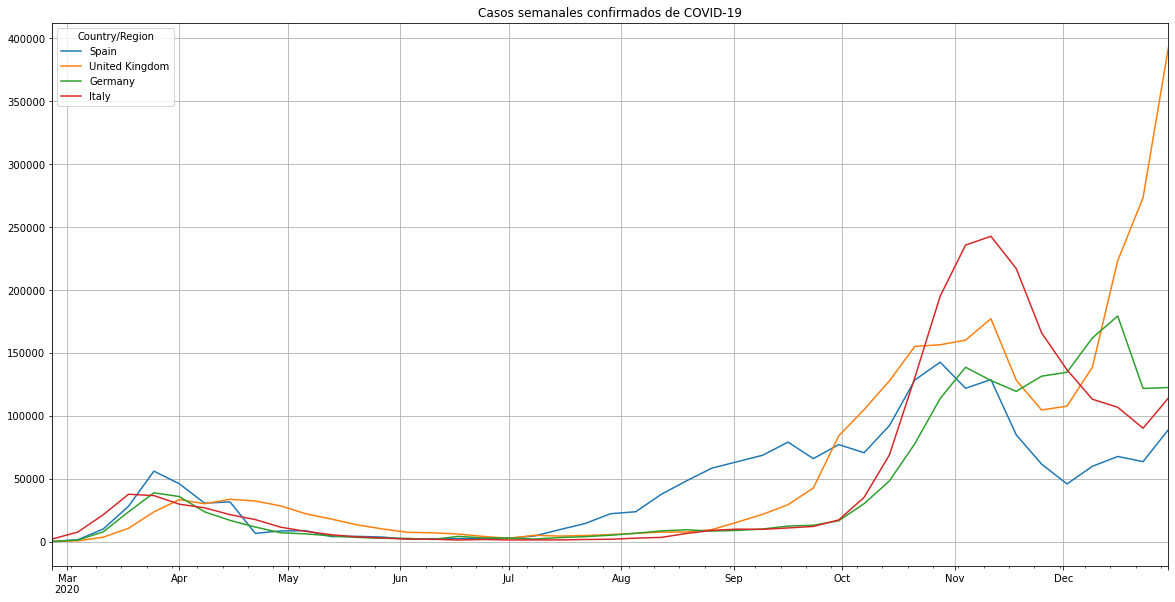

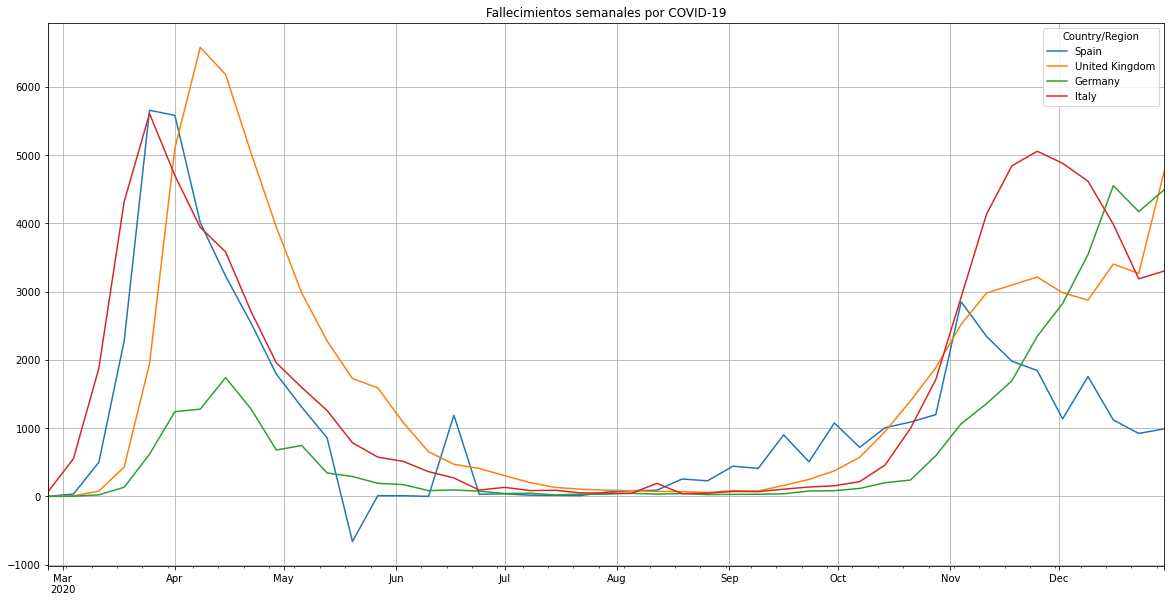

In [39]:
import datetime

deaths_covid_inc.index = pd.to_datetime(deaths_covid_inc.index)
confirmed_covid_inc.index = pd.to_datetime(confirmed_covid_inc.index)

# Parámetros a configurar
#interesting_countries = ['Spain','France','United Kingdom', 'Chile', 'Germany']
interesting_countries = ['Spain','United Kingdom', 'Germany', 'Italy' ]
nweeks = 45
resampling = '7D'
fsize = (20,10)
logaritmic = False
#fromdate='3/15/20'


# Establecimiento de límites en función de los parámetros
today = datetime.date.today()
#yesterday = today - datetime.timedelta(days=1)
fromdate=today - datetime.timedelta(weeks=nweeks)
todate=today


axc = confirmed_covid_inc[interesting_countries].loc[fromdate:todate].resample(resampling).sum().plot(title='Casos semanales confirmados de COVID-19', 
                                                                        figsize=fsize, 
                                                                        logy=logaritmic,
                                                                        grid=True
                                                                        )
axd = deaths_covid_inc[interesting_countries].loc[fromdate:todate].resample(resampling).sum().plot(title='Fallecimientos semanales por COVID-19', 
                                                                        figsize=fsize, 
                                                                        logy=logaritmic,
                                                                        grid=True                                                                      
                                                                       )